In [17]:
from rdkit.Chem.Scaffolds import MurckoScaffold, rdScaffoldNetwork
from sklearn.model_selection import train_test_split
from rdkit import Chem,DataStructs
from rdkit.Chem import MACCSkeys,Draw
import random
import pandas as pd
from MIL_functions import molecule_analysis,data_analysis,data_splitting
from sklearn.model_selection import RepeatedStratifiedKFold
from rdkit.Chem import PandasTools
import blosc
import pickle

In [15]:
a = pd.read_pickle('data\encoded\encoded_data_hansen.pk1')

In [18]:
def create_compressed_pickle(data,path):
    pickled_data = pickle.dumps(data)  # returns data as a bytes object
    compressed_pickle = blosc.compress(pickled_data)

    with open(path, "wb") as f:
        f.write(compressed_pickle)

def load_compressed_pickle(path):
    with open(path, "rb") as f:
        compressed_pickle = f.read()

    depressed_pickle = blosc.decompress(compressed_pickle)
    data = pickle.loads(depressed_pickle)  # turn bytes object back into data
    return data

In [22]:
create_compressed_pickle(pd.read_pickle('data\encoded\encoded_data_hansen.pk1'),'data\encoded\encoded_data_hansen.dat')

In [23]:
create_compressed_pickle(pd.read_pickle('data\encoded\encoded_data.pk1'),'data\encoded\encoded_data.dat')

In [3]:
pd.read_pickle('data\encoded\encoded_data.pk1')

,smiles,Ames,MACCS,RDKF,MACCS_MIL,RDKF_MIL,Morgan,Morgan_MIL
0,Nc1nc(N)nc(N)n1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,Nc1ccc2c(c1)oc1ccccc12,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,Nc1ccc([N+](=O)[O-])c(N)c1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,Nc1snc2c(Cl)cc(Cl)cc12,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,Nc1ccc(Oc2cccc(Oc3ccc(N)cc3)c2)cc1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...
452,Nc1c(S(=O)(=O)[O-])cc2cc(S(=O)(=O)[O-])ccc2c1N...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
453,[NH3+]c1c(O)ccc2ccccc12,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
454,Nc1ccc2nc3c(cc(N)c4ccccc43)[o+]c2c1.[O-][Cl+3]...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
455,Nc1ccc(-c2ccc(N)cc2)cc1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [2]:
import os

In [3]:
for file in os.listdir('model_results/external'):
    file_path = 'model_results/external'+"/"+file
    if file.endswith('.pk1'):
        edited = pd.read_pickle(file_path)
        edited = edited[edited['model'] !='TPOT']
        edited.to_pickle(file_path)

In [4]:
pd.read_pickle('model_results\external\ext_val_results_SEC_stratified_MORGAN.pk1')

,predicted,predicted labal,true label,fold,iteration,index,model,encoding
0,-0.346977,0,0,,,0,total_data_NSK_linear,Morgan
1,0.220009,1,0,,,1,total_data_NSK_linear,Morgan
2,0.802508,1,0,,,2,total_data_NSK_linear,Morgan
3,-0.010839,0,0,,,3,total_data_NSK_linear,Morgan
4,-0.098655,0,0,,,4,total_data_NSK_linear,Morgan
...,...,...,...,...,...,...,...,...
268,0.464213,1,1,,,86,total_data_NSK_polynomial,Morgan
269,0.758226,1,1,,,87,total_data_NSK_polynomial,Morgan
270,1.066740,1,1,,,88,total_data_NSK_polynomial,Morgan
271,0.662471,1,1,,,89,total_data_NSK_polynomial,Morgan


In [5]:
def label_data(data,reference_data):
    output = data.copy()
    def data_labels(reference_data):
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=6234794)
        first = True
        tested = []
        for fold,[train_index, validation_index] in enumerate(rskf.split(reference_data, reference_data["Ames"])):
            validation    =   reference_data.iloc[validation_index]
            tested += validation['smiles'].to_list()
        return tested

    labels = data_labels(reference_data)
    output['smiles'] = pd.Series(labels)
    PandasTools.AddMoleculeColumnToFrame(output,smilesCol='smiles',molCol='Molecule')
    return output

In [6]:
hansen_raw = pd.read_pickle('model_results/hansen/rscv_random_hansen_results.pk1')
favourite_model = hansen_raw[(hansen_raw['encoding']=='MACCS') & (hansen_raw['model']=='NSK polynomial')].reset_index(drop=True)
favourite_model = label_data(favourite_model,pd.read_pickle("data\encoded\encoded_data_hansen.pk1"))

In [7]:
len(favourite_model['smiles'].unique())

6505

,predicted,predicted labal,true label,fold,iteration,index,model,encoding,smiles,Molecule
0,-0.233568,0,0,0,0,0,NSK polynomial,MACCS,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,
1,1.318364,1,1,0,0,1,NSK polynomial,MACCS,Oc1cc2c3ccccc3ccc2c2ccccc12,
2,-0.737816,0,0,0,0,2,NSK polynomial,MACCS,CCSCCSP(=O)(OC)OC,
3,19.522605,1,1,0,0,3,NSK polynomial,MACCS,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...,
4,-0.567731,0,0,0,0,4,NSK polynomial,MACCS,COC(C)CCO,
...,...,...,...,...,...,...,...,...,...,...
6500,-1.388277,0,1,9,0,645,NSK polynomial,MACCS,Nc1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,
6501,-1.087206,0,0,9,0,646,NSK polynomial,MACCS,FC(F)(F)c1ccc(Cl)cc1,
6502,10.407739,1,1,9,0,647,NSK polynomial,MACCS,CC(=O)Oc1c(OC(C)=O)c2c([N+](=O)[O-])ccc3c4cccc...,
6503,-0.968064,0,0,9,0,648,NSK polynomial,MACCS,C=C(C)C1CCC(=C)C2C3=C(CC(C)C3=O)C(=O)C(C)=CC12,

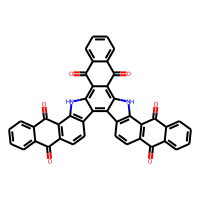
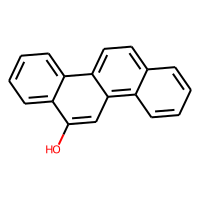
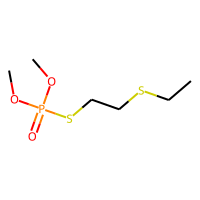
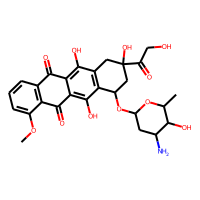
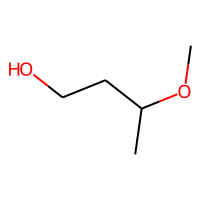
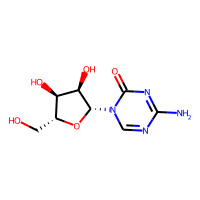
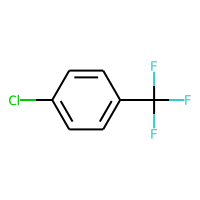
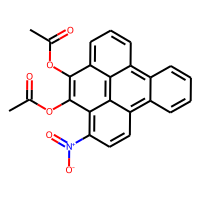
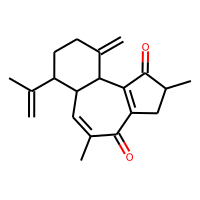
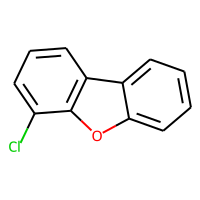

In [8]:
favourite_model

In [9]:
def molecule_group_analysis(data,function):
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [10]:
def phenol_aniline_benzamide_check(given_mol):
    def one_benzene(molecule):
        benzenes = molecule.GetSubstructMatches(Chem.MolFromSmiles('c1ccccc1'))
        if len(benzenes) == 1:
            return True
        else:
            return False
    
    mol = given_mol
    mols_to_check = {
        'phenol'    :   Chem.AddHs(Chem.MolFromSmiles('Oc1ccccc1'), onlyOnAtoms=[atom.GetIdx() for atom in Chem.MolFromSmiles('Oc1ccccc1').GetAtoms() if atom.GetAtomicNum() == 8]),
        'analine'   :   Chem.AddHs(Chem.MolFromSmiles('Nc1ccccc1'), onlyOnAtoms=[atom.GetIdx() for atom in Chem.MolFromSmiles('Nc1ccccc1').GetAtoms() if atom.GetAtomicNum() == 7]),
        'benzamide' :   Chem.MolFromSmiles('NC(=O)c1ccccc1')
    }
    mol = Chem.AddHs(mol)
    if one_benzene(mol):
        for molecule in mols_to_check.values(): 
            if mol.HasSubstructMatch(molecule):
                return True
    return False
def polyaromatic_check(given_mol):
    mol = given_mol
    ri = mol.GetRingInfo()
    all_ring_bonds = ri.BondRings(); aromatic_ring_bonds=[]
    for ring_bonds in all_ring_bonds:
        if all([mol.GetBondWithIdx(idx).GetIsAromatic() for idx in ring_bonds]): ## check all bonds in ring are aromatic i.e. aromatic ring
            aromatic_ring_bonds += [ring_bonds]
    for ring_bonds1 in aromatic_ring_bonds:
        shared_aromatic_bonds = 0
        for bond in ring_bonds1:
            for ring_bonds2 in aromatic_ring_bonds:    ##compare bond to bonds in other rings
                if ring_bonds1 != ring_bonds2:
                    if bond in ring_bonds2:
                        shared_aromatic_bonds +=1
        if shared_aromatic_bonds >=2:       #as for any system with 3 fused rings there must be a central ring with two adjacent rings sharing a bond
            return True
    return False

In [11]:
PAB_1 = molecule_group_analysis(data=favourite_model, function=phenol_aniline_benzamide_check)
if type(PAB_1) == pd.core.frame.DataFrame:
    PAB = data_analysis.ext_val_metrics(data_analysis.pickle_transform(PAB_1))
else:
    PAB = ''
PAB

Number of group: 48.3
Ames +: 211         Ames -: 272         Total: 483         Ames + (%): 43.685


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.693208,0.225113,0.385657,0.728778,0.685185,0.764045


In [12]:
PA_1 = molecule_group_analysis(data=favourite_model, function=polyaromatic_check)
if type(PA_1) == pd.core.frame.DataFrame:
    PA = data_analysis.ext_val_metrics(data_analysis.pickle_transform(PA_1))
else:
    PA = ''
PA

Number of group: 96.6
Ames +: 825         Ames -: 141         Total: 966         Ames + (%): 85.404


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.882462,0.130619,0.762525,0.802277,0.89625,0.349398


4-benzyl-piperidines

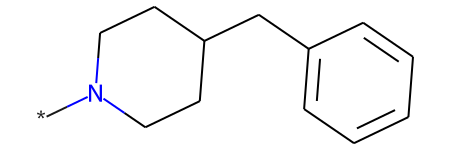

In [13]:
Chem.MolFromSmiles('*N2CCC(Cc1ccccc1)CC2')

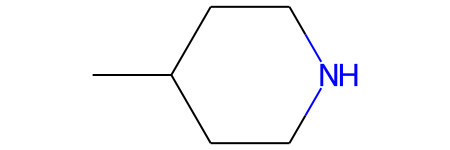

In [14]:
Chem.MolFromSmiles('N2CCC(C)CC2')

In [15]:
def test_check(given_mol):
    mol = given_mol
    mol = Chem.AddHs(mol)
    if mol.HasSubstructMatch(Chem.MolFromSmiles('N2CCC(C)CC2')):
        return True
    return False

In [16]:
def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [17]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

14
Number of group: 1.4
Ames +: 1           Ames -: 13          Total: 14          Ames + (%): 7.143


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.285714,0.093023,-0.590909,0.642857,0.166667,1.0


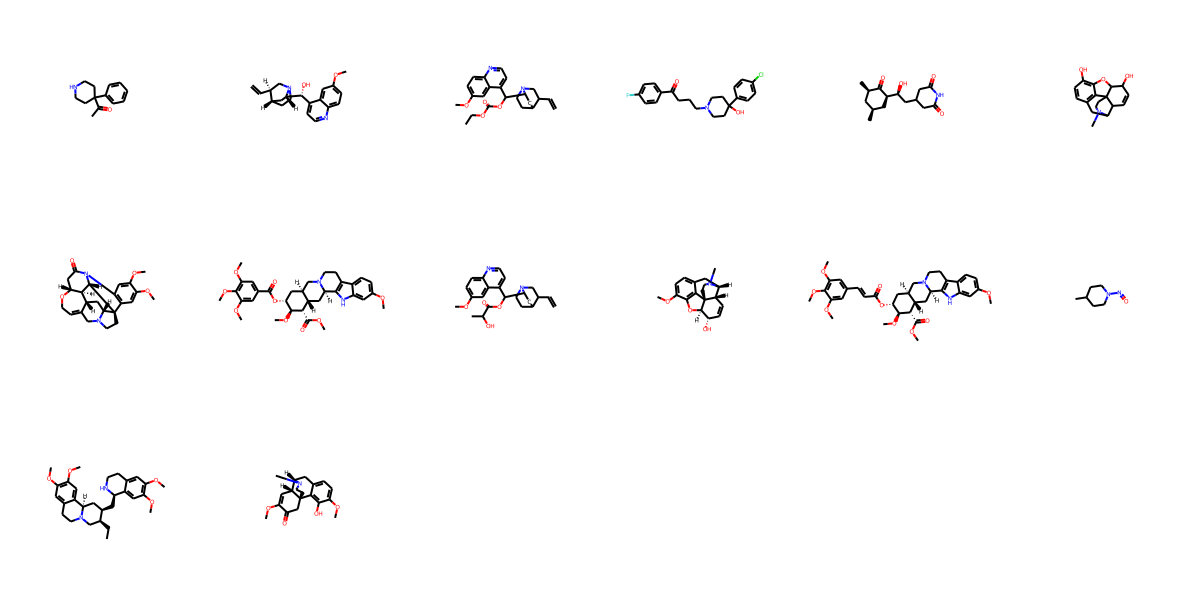

In [18]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

Alkyl/Alkenyl Halide

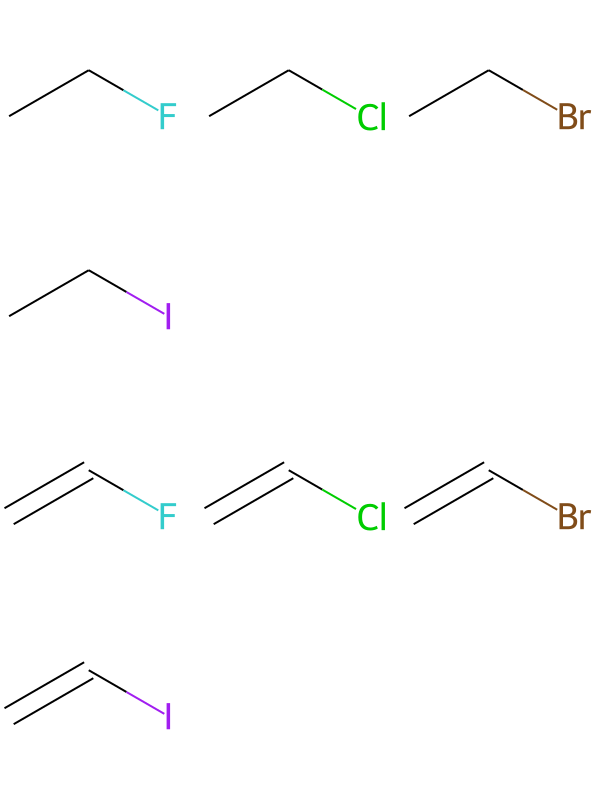

In [19]:
alkyl_options = ['CCF','CCCl','CCBr','CCI','CCAt','CCTs']
alkenyl_options = ['C=CF','C=CCl','C=CBr','C=CI','C=CAt','C=CTs']
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in alkyl_options+alkenyl_options])

In [20]:
a = Chem.MolFromSmiles('CCBr')
mol = a
halides = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in [9,17,35,53,85,117]]
if any(halides):
    halides = [halide for halide in halides if halide.GetDegree()==1]

In [21]:
halides = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in [9,17,35,53,85,117]]
if any(halides):
    halides = [halide for halide in halides if halide.GetDegree()==1]
    halide_C_neighbors = [neighbor for halide in halides for neighbor in halide.GetNeighbors() if neighbor.GetAtomicNum()==6]
    halide_C_C_bonds = [bond.GetBondType() for bond in halide_C_neighbors[0].GetBonds() if all([bond.GetEndAtom().GetAtomicNum()==6,bond.GetBeginAtom().GetAtomicNum()==6])]
    any([halide_C_C_bond in [Chem.rdchem.BondType.SINGLE,Chem.rdchem.BondType.DOUBLE] for halide_C_C_bond in halide_C_C_bonds])

In [22]:
halide_C_C_bonds

[rdkit.Chem.rdchem.BondType.SINGLE]

In [23]:
halide_C_C_bonds

[rdkit.Chem.rdchem.BondType.SINGLE]

In [335]:
a = Chem.MolFromSmiles(test_1['smiles'].to_list()[2])
alkyl_alkenyl_halide_check(a)

False

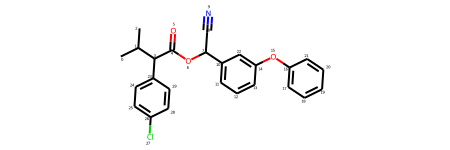

In [321]:
a

In [361]:
def alkyl_alkenyl_halide_check(given_mol):  
    if given_mol:
        mol = given_mol
        mol = Chem.AddHs(mol)

        halides = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in [9,17,35,53,85,117]]
        if any(halides):
            ring_info = mol.GetRingInfo()
            if not ring_info.NumRings() >0:
                if all(True if atom.GetAtomicNum() in [1,6,9,17,35,53,85,117] else False for atom in mol.GetAtoms()):
                    return True


        halides = [atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in [9,17,35,53,85,117]]
        # if any(halides):
        #     halides = [halide for halide in halides if halide.GetDegree()==1]
        #     if any(halides):
        #         for halide in halides:
        #             halide_C_neighbors = [neighbor for neighbor in halide.GetNeighbors() if (neighbor.GetAtomicNum()==6 and neighbor.GetIsAromatic()==False and not neighbor.IsInRing())]
        #             if any(halide_C_neighbors):
        #                 halide_C_C_bonds = [bond.GetBondType() for bond in halide_C_neighbors[0].GetBonds() if all([bond.GetEndAtom().GetAtomicNum()==6,bond.GetBeginAtom().GetAtomicNum()==6])]
        #                 if any(halide_C_C_bonds):
        #                     if any([halide_C_C_bond in [Chem.rdchem.BondType.SINGLE,Chem.rdchem.BondType.DOUBLE] for halide_C_C_bond in halide_C_C_bonds]):
        #                         return True
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [362]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=alkyl_alkenyl_halide_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

100
Number of group: 10.0
Ames +: 51          Ames -: 49          Total: 100          Ames + (%): 51.0


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.702128,0.220782,0.41127,0.72,0.767442,0.684211


c:\Users\user.000\anaconda3\envs\fuck\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


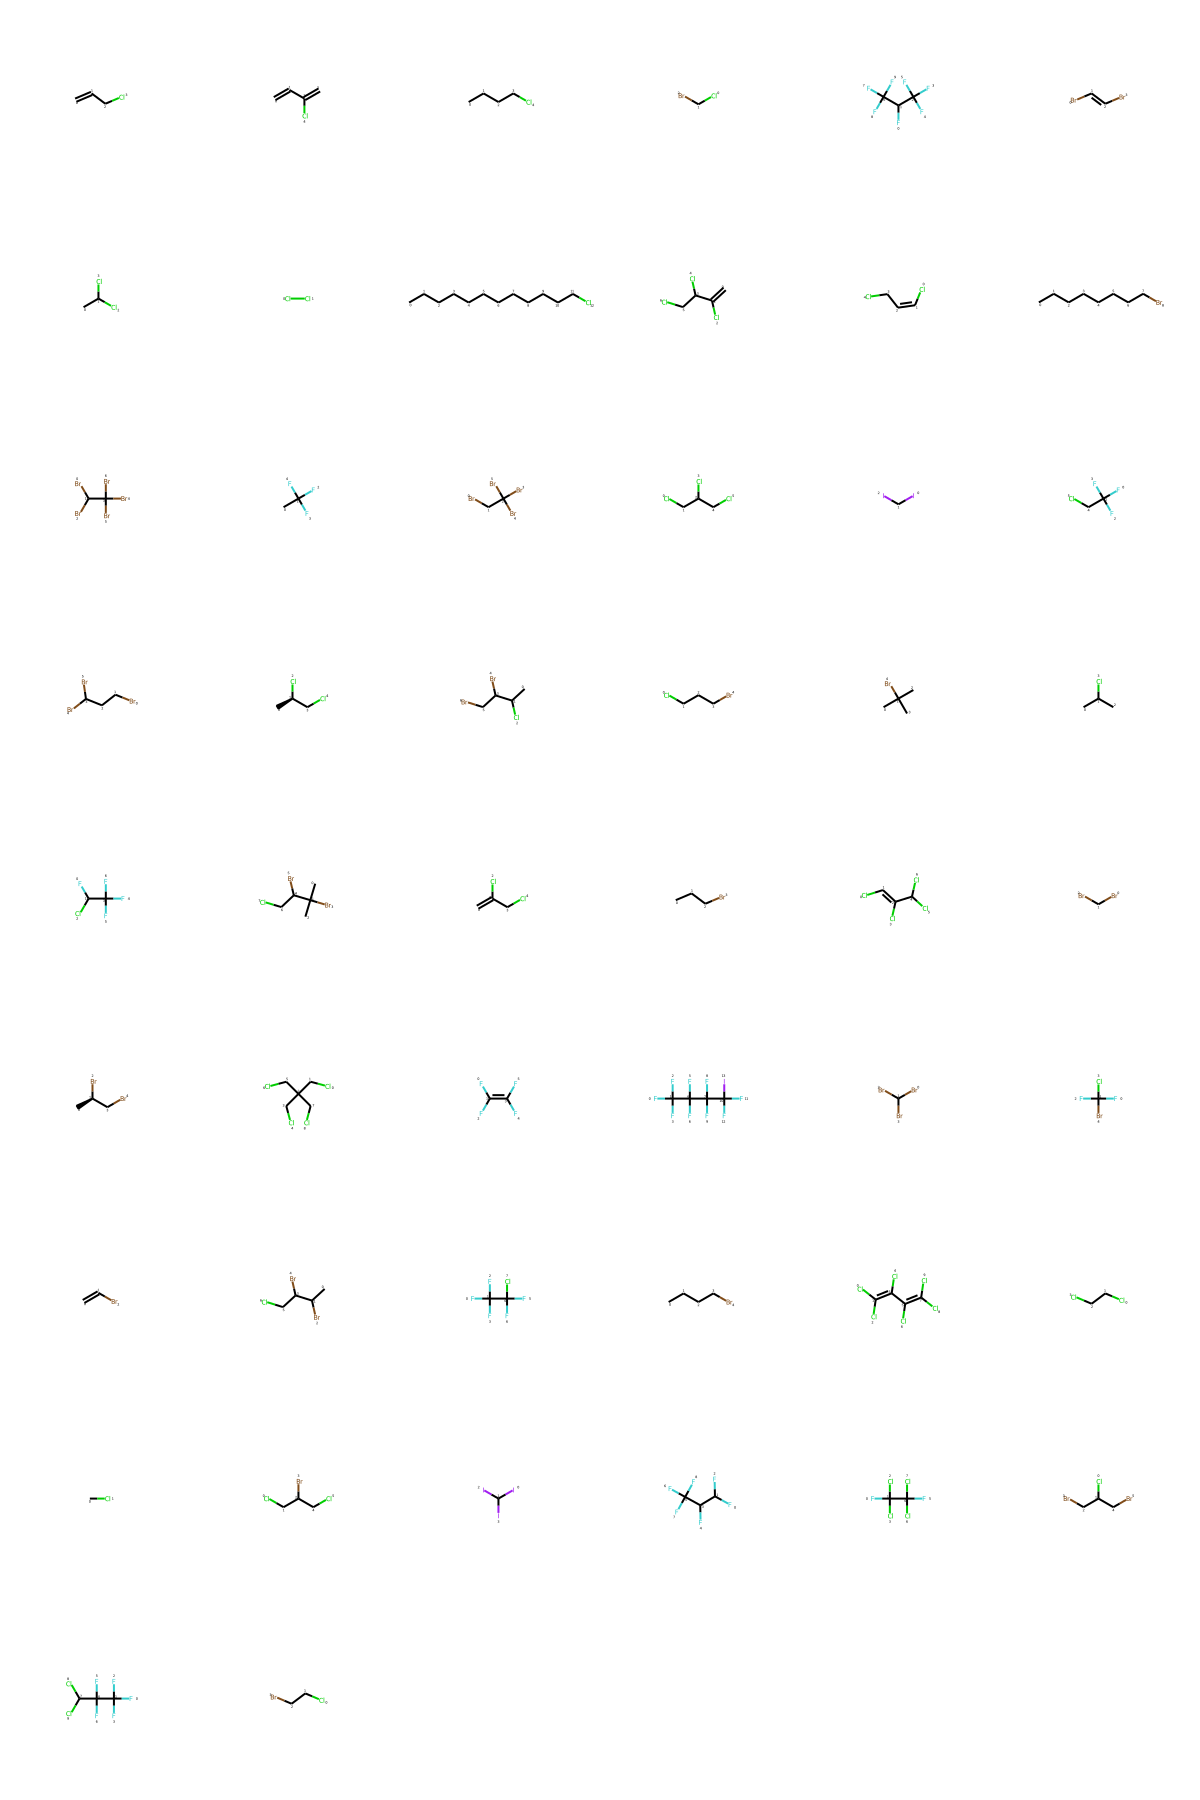

In [363]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

azides

In [27]:
def azide_check(given_mol):
    mol = given_mol
    group = Chem.MolFromSmiles('[N-]=[N+]=N')
    if mol.HasSubstructMatch(group):
        return True
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [28]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=azide_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

63
Number of group: 6.3
Ames +: 61          Ames -: 2           Total: 63           Ames + (%): 96.825


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.923077,-0.025974,0.840864,0.857143,0.964286,0.0


In [29]:
# Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

octahydrobenzo[f]
benzoquinolines (9)

In [30]:
def test_check(given_mol):
    mol = given_mol
    # group = Chem.MolFromSmiles('*c1cccc2c1CCC3C2CC(*)CN3*')
    # group = Chem.MolFromSmiles('c1cccc2c1CCC3C2CCCN3')
    group = Chem.MolFromSmiles('C2CCC1NCCCC1C2')
    if mol.HasSubstructMatch(group):
        return True
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

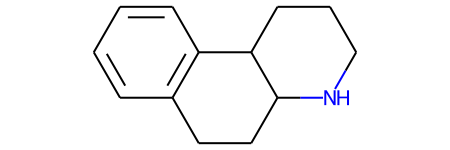

In [31]:
Chem.MolFromSmiles('c1cccc2c1CCC3C2CCCN3')

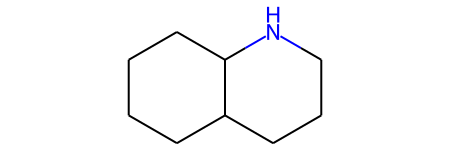

In [32]:
Chem.MolFromSmiles('C2CCC1NCCCC1C2')

In [33]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

6
Number of group: 0.6
Ames +: 4           Ames -: 2           Total: 6           Ames + (%): 66.667


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.8,0.0,0.666667,0.666667,0.666667,0


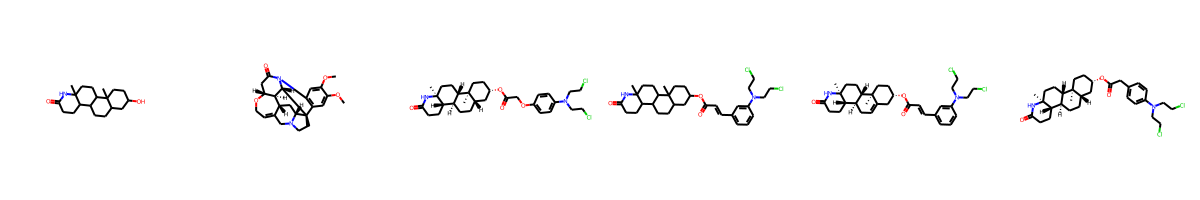

In [34]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

Phenol aniline benzamide

In [35]:
def test_check(given_mol):
    def one_benzene(molecule):
        benzenes = molecule.GetSubstructMatches(Chem.MolFromSmiles('c1ccccc1'))
        if len(benzenes) == 1:
            return True
        else:
            return False

    def benzamide_check(mole):
        benzamide = Chem.MolFromSmiles('NC(=O)c1ccccc1')
        if mol.HasSubstructMatch(benzamide):
            base_structures = mole.GetSubstructMatches(benzamide)
            for base_structure in base_structures:
                base_N = [base_atom for base_atom in [mole.GetAtomWithIdx(x)for x in base_structure] if base_atom.GetAtomicNum()==7]
                if len(base_N)==1:
                    base_N = base_N[0]
                    N_neighbors = [N_neighbor for N_neighbor in base_N.GetNeighbors() if N_neighbor.GetIdx() not in base_structure]
                    if N_neighbors:
                        if all(N_neighbor.GetAtomicNum() in [1,6] for N_neighbor in N_neighbors):
                            # neighbor_neighbors = [neighbor_neighbor for neighbor_neighbor in N_neighbors if neighbor_neighbor.GetIdx() not in base_structure]
                                # if all(neighbor_neighbor.GetAtomicNum() in [1,6] for neighbor_neighbor in neighbor_neighbors):
                            # if  all(all(neighbor_neighbor.GetAtomicNum() in [1,6] for neighbor_neighbor in N_neighbor.GetNeighbors() if neighbor_neighbor else True) for N_neighbor in N_neighbors if N_neighbor else True):
                                if  all(all(neighbor_neighbor.GetAtomicNum() in [1,6] if (neighbor_neighbor and neighbor_neighbor.GetIdx() not in base_structure) else True for neighbor_neighbor in N_neighbor.GetNeighbors()) for N_neighbor in N_neighbors):
                                    return True
                    else:
                        return True
        
    mol = given_mol
    mols_to_check = {
        'phenol'    :   Chem.AddHs(Chem.MolFromSmiles('Oc1ccccc1'), onlyOnAtoms=[atom.GetIdx() for atom in Chem.MolFromSmiles('Oc1ccccc1').GetAtoms() if atom.GetAtomicNum() == 8]),
        'analine'   :   Chem.AddHs(Chem.MolFromSmiles('Nc1ccccc1'), onlyOnAtoms=[atom.GetIdx() for atom in Chem.MolFromSmiles('Nc1ccccc1').GetAtoms() if atom.GetAtomicNum() == 7]),
        'benzamide' :   Chem.MolFromSmiles('NC(=O)c1ccccc1')
    }
    mol = Chem.AddHs(mol)
    if one_benzene(mol):
        for molecule in mols_to_check.values(): 
            if molecule == mols_to_check['benzamide']:
                if benzamide_check(mol):
                    return True  
            else: 
                if mol.HasSubstructMatch(molecule):
                    return True
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

[True, False, True, True, False, False]


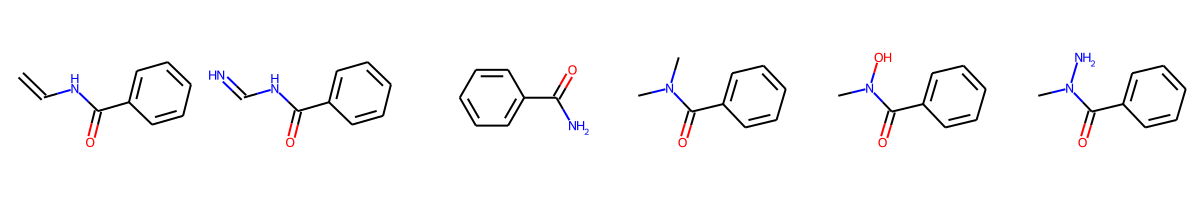

In [36]:
m1 = Chem.MolFromSmiles('C=CNC(=O)c1ccccc1')
m2 = Chem.MolFromSmiles('N=CNC(=O)c1ccccc1')
m3 = Chem.MolFromSmiles('NC(=O)c1ccccc1')
m4 = Chem.MolFromSmiles('CN(C)C(=O)c1ccccc1')
m5 = Chem.MolFromSmiles('CN(O)C(=O)c1ccccc1')
m6 = Chem.MolFromSmiles('CN(N)C(=O)c1ccccc1')

print([test_check(m) for m in [m1,m2,m3,m4,m5,m6]])
Draw.MolsToGridImage([m1,m2,m3,m4,m5,m6],molsPerRow=6)

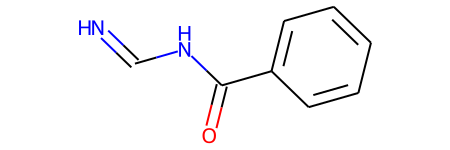

In [37]:
m2

In [38]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

450
Number of group: 45.0
Ames +: 191         Ames -: 259         Total: 450         Ames + (%): 42.444


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.673575,0.214243,0.346247,0.72,0.666667,0.760784


c:\Users\user.000\anaconda3\envs\fuck\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


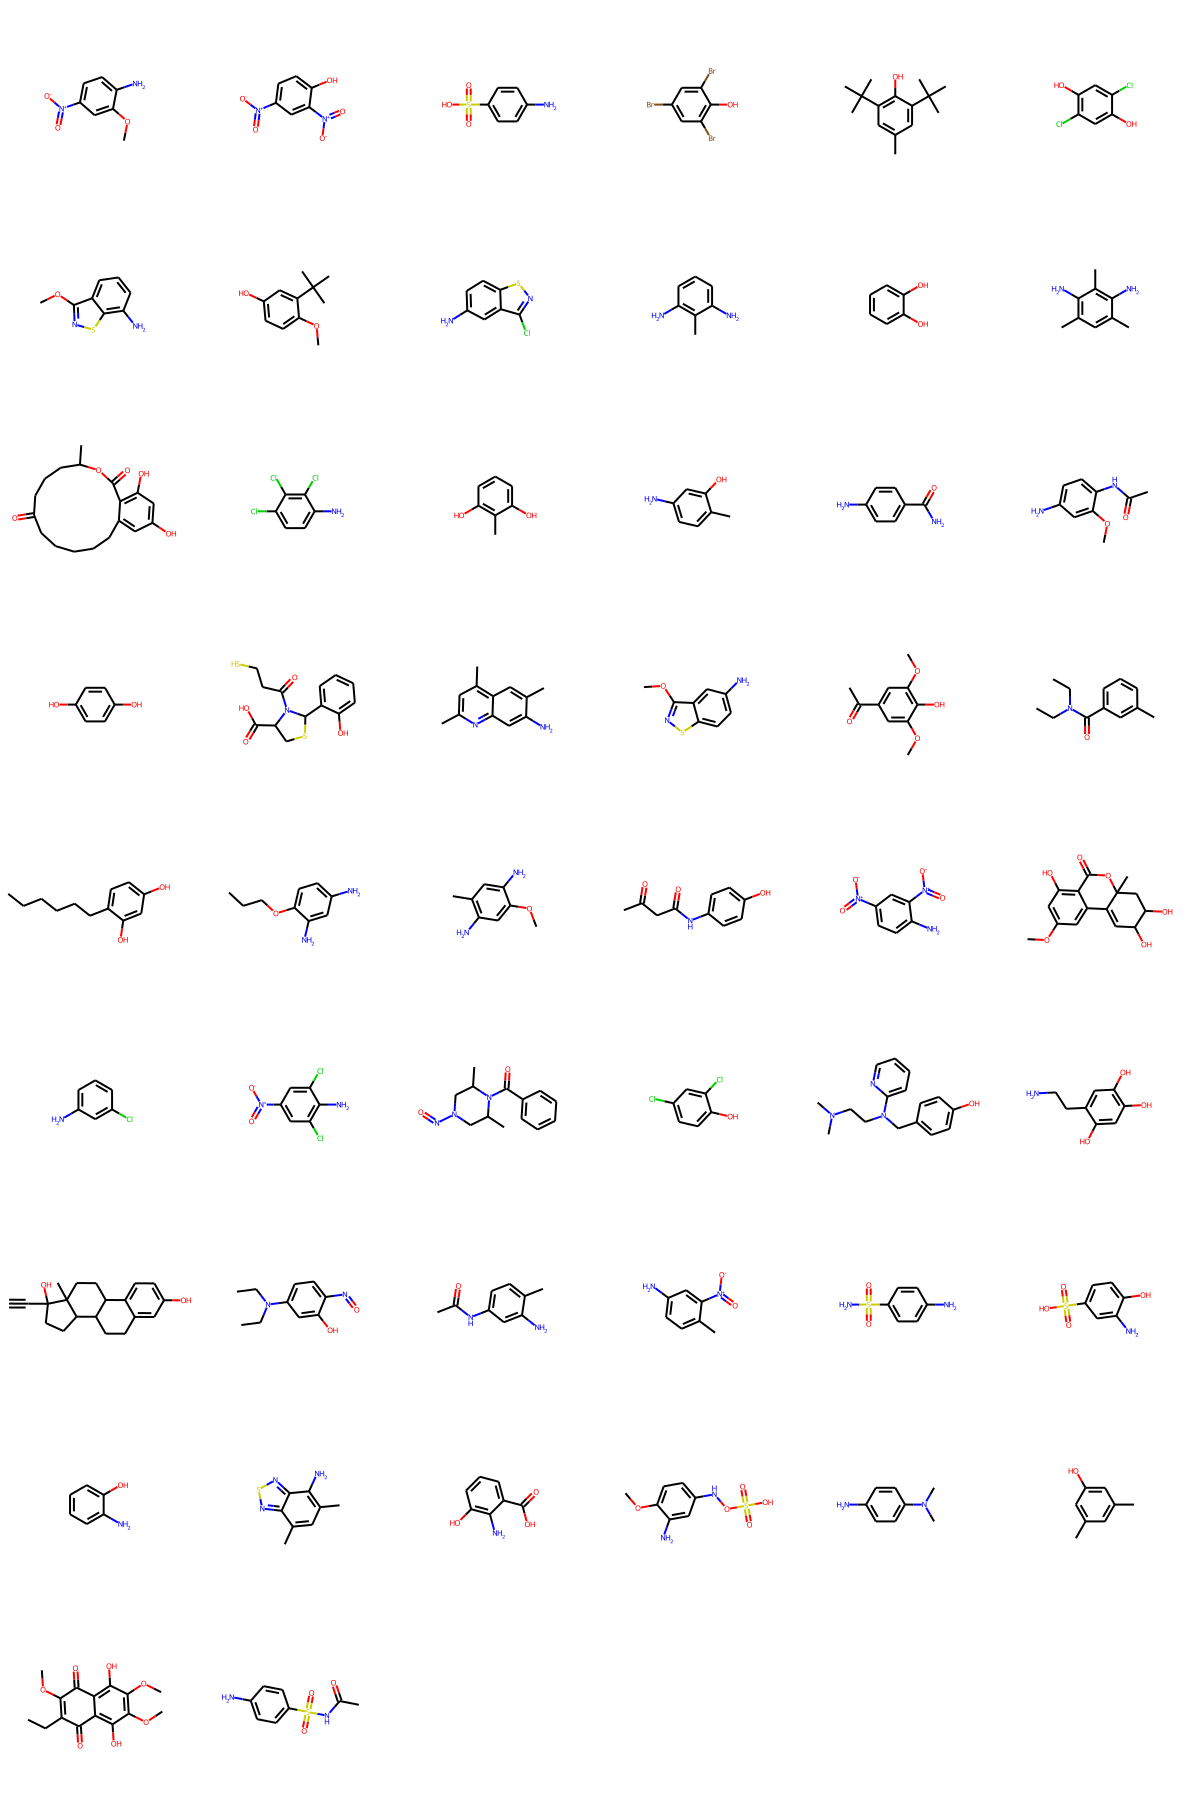

In [39]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

OTHER

In [40]:
from rdkit.Chem import AllChem

In [41]:
smi = 'Oc1cc2c3ccccc3ccc2c2ccccc12'
AllChem.GetMorganFingerprint(Chem.MolFromSmiles(smi),2)

In [42]:
int_results_raw =  pd.read_pickle('model_results\internal\MIL_aromatic_amine_cv_results_MORGAN.pk1')
int_results = data_analysis.pickle_transform(int_results_raw)
micro_results = data_analysis.macro_mirco_mean_stdv(int_results,ext_val=True)
# macro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=macro_results)
# micro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=micro_results)

In [43]:
pd.read_pickle('model_results\internal\MIL_aromatic_amine_cv_results_MORGAN.pk1')

,predicted,predicted labal,true label,fold,iteration,index,model,encoding
0,-0.181549,0,0,0,0,0,MISVM_linear,Morgan
1,-0.182516,0,0,0,0,1,MISVM_linear,Morgan
2,-0.127761,0,0,0,0,2,MISVM_linear,Morgan
3,-0.215868,0,0,0,0,3,MISVM_linear,Morgan
4,-0.265246,0,0,0,0,4,MISVM_linear,Morgan
...,...,...,...,...,...,...,...,...
54745,-0.444944,0,1,9,9,31,sMIL_polynomial,Morgan
54746,0.082777,1,1,9,9,32,sMIL_polynomial,Morgan
54747,1.859028,1,1,9,9,33,sMIL_polynomial,Morgan
54748,1.129779,1,1,9,9,34,sMIL_polynomial,Morgan


In [44]:
int_results

,encoding,model,fold,iteration,TP,TN,FP,FN
0,Morgan,MISVM_linear,0,0,0,13,0,24
1,Morgan,SIL_linear,0,0,22,5,8,2
2,Morgan,NSK_linear,0,0,19,8,5,5
3,Morgan,sbMIL-linear,0,0,2,13,0,22
4,Morgan,sMIL_linear,0,0,21,2,11,3
...,...,...,...,...,...,...,...,...
1495,Morgan,MISVM_polynomial,9,9,16,9,3,8
1496,Morgan,SIL_polynomial,9,9,21,5,7,3
1497,Morgan,NSK_polynomial,9,9,18,9,3,6
1498,Morgan,sbMIL-polynomial,9,9,2,12,0,22


In [45]:
micro_results

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,MISVM_linear,0.000000,0.000000,0.000000,0.331507,0.000000,0.331507
1,Morgan,SIL_linear,0.824720,0.138376,0.681259,0.729589,0.727672,0.742919
2,Morgan,NSK_linear,0.839746,0.241549,0.683817,0.778630,0.813605,0.691794
3,Morgan,sbMIL-linear,0.053734,0.002975,-0.005696,0.343836,0.747253,0.333521
4,Morgan,sMIL_linear,0.759458,0.115262,0.524494,0.669041,0.738575,0.500936
5,Morgan,MISVM_quadratic,0.842459,0.273226,0.682849,0.794247,0.862914,0.673469
6,Morgan,SIL_quadratic,0.851246,0.224125,0.718395,0.780822,0.779101,0.787921
7,Morgan,NSK_quadratic,0.838563,0.260106,0.676363,0.785753,0.844842,0.671750
8,Morgan,sbMIL-quadratic,0.193548,0.023044,0.013142,0.390411,0.836991,0.347643
9,Morgan,sMIL_quadratic,0.652626,0.116342,0.314380,0.606849,0.797161,0.442573


# False Positives

nitro aromatic compounds

In [49]:
def test_check(given_mol):
    mol = given_mol
    ###### Complex aromatic check
    # nitro = Chem.MolFromSmiles('O=NO')
    # if mol.HasSubstructMatch(nitro):
    #         base_structures = mol.GetSubstructMatches(nitro)
    #         for base_structure in base_structures:
    #             base_N = [base_atom for base_atom in [mol.GetAtomWithIdx(x)for x in base_structure] if base_atom.GetAtomicNum()==7]
    #             if len(base_N)==1:
    #                 base_N = base_N[0]
    #                 N_neighbors = [N_neighbor for N_neighbor in base_N.GetNeighbors() if N_neighbor.GetIdx() not in base_structure]
    #                 if len(N_neighbors)==1:
    #                     N_neighbor = N_neighbors[0]
    #                     if N_neighbor.GetIsAromatic() == True:
    #                         return True

    ###### Simple aromatic check (benzene)
    aromatic_nitro = Chem.MolFromSmiles('O=[N+](O)c1ccccc1')
    if mol.HasSubstructMatch(aromatic_nitro):
        return True
    return False

            # Note: simple aromatic check was used since the complex version found more molecules than that in the paper using a subset of its data

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [50]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

771
Number of group: 77.1
Ames +: 631         Ames -: 140         Total: 771         Ames + (%): 81.842


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.871176,0.169276,0.739901,0.792477,0.885434,0.4375


In [52]:
# Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

Quinolines

In [86]:
def test_check(given_mol):
    failed = False
    mol = given_mol
    quinoline = Chem.MolFromSmiles('c2ccc1ncccc1c2')
    if mol.HasSubstructMatch(quinoline): 
        ###### This checks that no additional aromatic groups are attached to the quinoline (extra fused rings)
        base_structures = mol.GetSubstructMatches(quinoline)
        for base_structure in base_structures:
            for idx in base_structure:
                base = mol.GetAtomWithIdx(idx)
                neighbors = [neighbor for neighbor in base.GetNeighbors() if neighbor.GetIdx() not in base_structure]
                if any(neighbor.GetIsAromatic() for neighbor in neighbors):
                    failed = True
            if not failed:
                return True
    return False

            # Note: simple aromatic check was used since the complex version found more molecules than that in the paper using a subset of its data

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [88]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

140
Number of group: 14.0
Ames +: 66          Ames -: 74          Total: 140          Ames + (%): 47.143


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.716418,0.228128,0.432594,0.728571,0.705882,0.75


In [90]:
# Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

2,5-diamino-4-phenylpyridines

In [98]:
def test_check(given_mol):
    N_passed = []
    mol = given_mol
    # target = Chem.MolFromSmiles('Nc2cc(c1ccccc1)c(N)cn2')
    target = Chem.MolFromSmiles('c2ccc(c1ccncc1)cc2')

    if mol.HasSubstructMatch(target):
        return True
        base_structures = mol.GetSubstructMatches(target)
        for base_structure in base_structures:
            base_Ns = [base_atom for base_atom in [mol.GetAtomWithIdx(x)for x in base_structure] if base_atom.GetAtomicNum()==7]
            if len(base_Ns)==3:
                base_Ns = [base_N for base_N in base_Ns if not base_N.GetIsAromatic()]
                if len(base_Ns) == 2:
                    for base_N in base_Ns:
                        N_neighbors = [N_neighbor for N_neighbor in base_N.GetNeighbors() if N_neighbor.GetIdx() not in base_structure]
                        if N_neighbors:
                            if all(N_neighbor.GetAtomicNum() in [1,6] for N_neighbor in N_neighbors):
                                if  all(all(neighbor_neighbor.GetAtomicNum() in [1,6] if (neighbor_neighbor and neighbor_neighbor.GetIdx() not in base_structure) else True for neighbor_neighbor in N_neighbor.GetNeighbors()) for N_neighbor in N_neighbors):
                                    N_passed += True
                        else:
                            N_passed += True
                    if N_passed == [True,True]:
                        return True
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [99]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

6
Number of group: 0.6
Ames +: 4           Ames -: 2           Total: 6           Ames + (%): 66.667


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.571429,0.0,0.142857,0.5,0.666667,0.333333


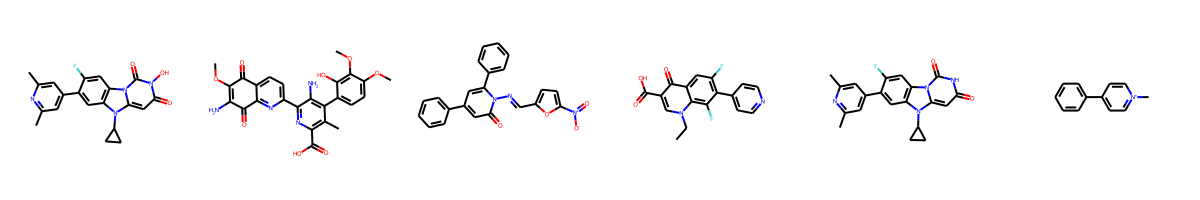

In [100]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)

Furan w/o nitro

In [148]:
furan = Chem.MolFromSmiles('c1ccoc1')


In [187]:
def check_mol_nitrogen(mole,nitrogen_index,furan_atom_index):
    edited_mol = Chem.RWMol(mole)
    nitro_frag_smi = '[3*][N+](=O)O'
    furan_N_bond_idx = edited_mol.GetBondBetweenAtoms(nitrogen_index,furan_atom_index).GetIdx()
    frags = Chem.FragmentOnBonds(edited_mol, [furan_N_bond_idx])
    for frag in Chem.GetMolFrags(frags, asMols=True):
        if Chem.MolToSmiles(frag) == nitro_frag_smi:
            return False
    return True

In [152]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [392]:
def test_check(given_mol):
    def check_mol_nitrogen(mole,nitrogen_index,furan_atom_index):
        edited_mol = Chem.RWMol(mole)
        nitro = Chem.MolFromSmiles('O=NO')
        furan_N_bond_idx = edited_mol.GetBondBetweenAtoms(nitrogen_index,furan_atom_index).GetIdx()
        frags = Chem.FragmentOnBonds(edited_mol, [furan_N_bond_idx])
        # try:
        global f
        if len(Chem.GetMolFrags(frags, asMols=False)) >1:
            for frag in Chem.GetMolFrags(frags, asMols=True):
                if frag.HasSubstructMatch(nitro):
                    if any(all(True for neighbor in atom.GetNeighbors() if neighbor.GetAtomicNum()==7 and len(atom.GetNeighbors())==1) for atom in frag.GetAtoms() if atom.GetAtomicNum()==0):
                        if frag.GetNumAtoms()==4:
                            return False
            return True
    def exclude_furan_fused_rings(mole):
        furan = Chem.MolFromSmiles('c1ccoc1')
        if mole.HasSubstructMatch(furan):
            base_structures = mole.GetSubstructMatches(furan)
            for base_structure in base_structures:
                for idx in base_structure:
                    base = mole.GetAtomWithIdx(idx)
                    neighbors = [neighbor for neighbor in base.GetNeighbors() if neighbor.GetIdx() not in base_structure]
                    if neighbors:
                        if not any(mole.GetBondBetweenAtoms(idx,neighbor.GetIdx()).IsInRing() for neighbor in neighbors):
                            return True
        return False
    
    mol = given_mol
    furan = Chem.MolFromSmiles('c1ccoc1')
        
    if exclude_furan_fused_rings(mol):
        if mol.HasSubstructMatch(furan):
            base_structures = mol.GetSubstructMatches(furan)
            for base_structure in base_structures:
                failed = False
                for idx in base_structure:
                    base = mol.GetAtomWithIdx(idx)
                    neighbors = [neighbor for neighbor in base.GetNeighbors() if neighbor.GetIdx() not in base_structure]
                    if neighbors:
                        N_neighbor = [neighbor for neighbor in neighbors if neighbor.GetAtomicNum()==7]
                        if len(N_neighbor):
                            N_neighbor = N_neighbor[0]
                            if not check_mol_nitrogen(mole=mol,nitrogen_index = N_neighbor.GetIdx(),furan_atom_index=idx):
                                    failed = True

                if not failed:
                    return True
                    
    return False

def molecule_group_analysis_test(data,function):
    print(sum(data['Molecule'].apply(lambda x: function(x))))
    molecule_group = data[data['Molecule'].apply(lambda x: function(x))]
    if molecule_group.empty:
        print('Molecule group not found')
        return
    else:
        print('Number of group:', len(molecule_group)/sum([len(molecule_group[molecule_group['encoding']==encoding]['model'].unique()) for encoding in molecule_group['encoding'].unique()])/10)
        amesP = sum(molecule_group['true label']==1)
        amesN = sum(molecule_group['true label']==0)
        print('Ames +:',amesP," "*(10-len(str(amesP))),'Ames -:',amesN," "*(10-len(str(amesN))),'Total:',amesN+amesP," "*(10-len(str(amesN))),'Ames + (%):',round(amesP*100/(amesN+amesP),3),)
        return molecule_group

In [393]:
test_1 = molecule_group_analysis_test(data=favourite_model, function=test_check)
if type(test_1) == pd.core.frame.DataFrame:
    test = data_analysis.ext_val_metrics(data_analysis.pickle_transform(test_1))
else:
    test = ''
test

38
Number of group: 3.8
Ames +: 9           Ames -: 29          Total: 38          Ames + (%): 23.684


c:\Uni\Honours\publication_final\MIL_functions\data_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["true label"] = results["true label"].apply(lambda x: pos_or_neg(x))


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.421053,0.114391,-0.1875,0.710526,0.4,0.821429


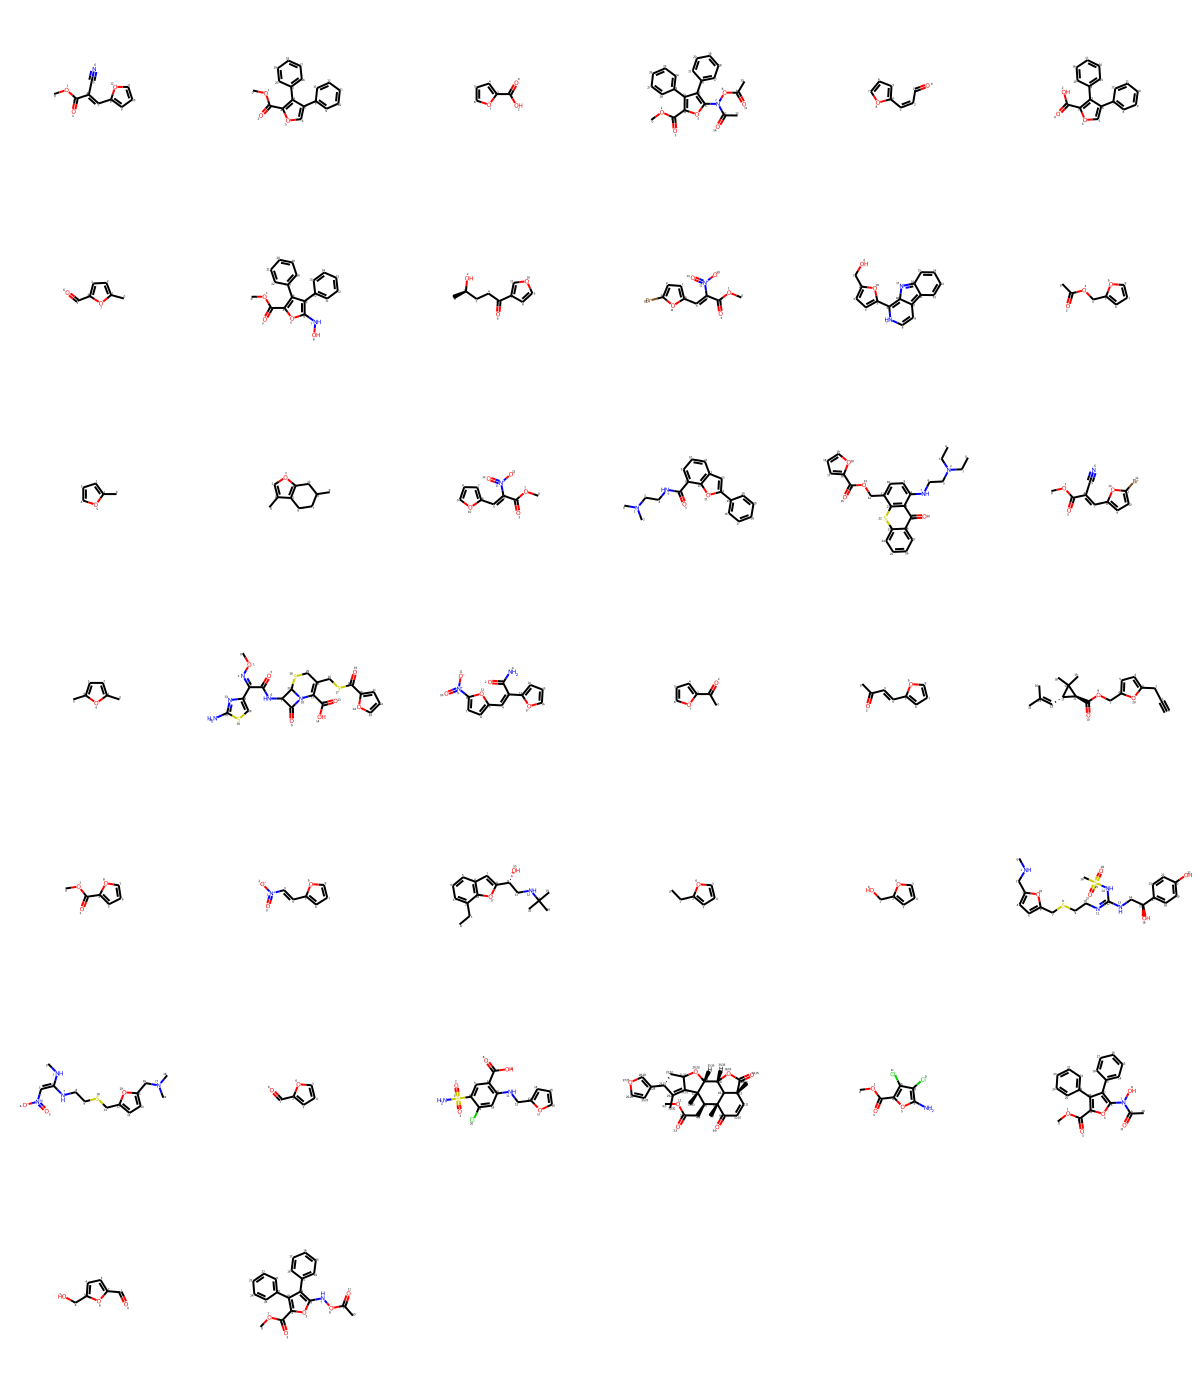

In [394]:
Draw.MolsToGridImage(test_1['smiles'].apply(lambda x: Chem.MolFromSmiles(x)).to_list(),molsPerRow=6)